In [1]:
from turbo import Turbo1
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:


class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)



In [3]:


turbo1 = Turbo1(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=20,  # Number of initial bounds from an Latin hypercube design
    max_evals = 1000,  # Maximum number of evaluations
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cuda",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
)



Using dtype = torch.float64 
Using device = cuda
Initial trust region: length_init=0.8, length_min=0.0078125, length_max=12.8


In [4]:


turbo1.optimize()



Starting from fbest = 20.18, log(fbest) = 3.005
Initial loss:  1.4318250992113026
Final loss:  1.172988412291561
30) New best: 17.17, log(fbest) = 2.843
Initial loss:  1.3263561673992728
Final loss:  1.0839065628751616
40) New best: 16.7, log(fbest) = 2.815
Initial loss:  1.153853211827263
Final loss:  0.8925411975816105
[TR EXPAND] Trust region expanded: 0.8 -> 1.6
50) New best: 8.064, log(fbest) = 2.087
Initial loss:  1.1444743220781384
Final loss:  0.8472862089063276
60) New best: 7.321, log(fbest) = 1.991
Initial loss:  1.102118891685636
Final loss:  0.8404612298203226
70) New best: 5.575, log(fbest) = 1.718
Initial loss:  0.942852018172685
Final loss:  0.6825183386837965
[TR EXPAND] Trust region expanded: 1.6 -> 3.2
80) New best: 5.258, log(fbest) = 1.66
Initial loss:  0.8554291447332764
Final loss:  0.5104856334542116
[TR CONTRACT] Trust region contracted: 3.2 -> 1.6
Initial loss:  0.7862661685316696
Final loss:  0.45429118433007437
100) New best: 4.162, log(fbest) = 1.426
Initia

Best value found:
	f(x) = 0.001
Observed at:
	x = [9.011 1.018 1.01  1.002 0.992 1.009 0.998 0.98  1.006 1.017]


/tmp/ipykernel_25485/3173599735.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))


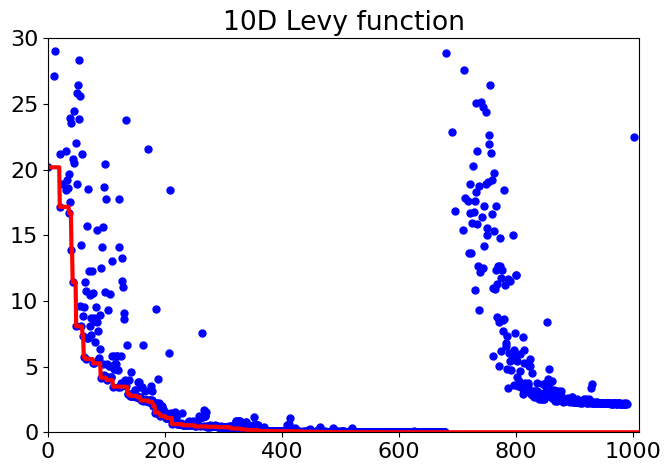

In [5]:
X = turbo1.X  # Evaluated points
fX = turbo1.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()